# Assignment 2 —Project Data Analysis


# 1. Data Description

Brief: Carry out a structured analysis of a portion of the data provided by your data holder. This should be structured as follows. This assignment is carried out with your group project. However, each student has to hand in their own and individual analysis. Within each group, students should decide that each student is doing an independent piece of analysis on a different part of the data.

### Describe

1. The type of data obtained by our group from API is hierarchical data, and the format is JSON. The data are about Edinburgh Festivals and performances. 


2. Edinburgh Festival Fringe has 4257 data in 2019, 3985 in 2018 and 3795 in 2017. Each of these data represents a festival event. There are 34 keys in each festival and most of them have meaningful value, mainly string, boolean and number. Some keys have nested list or dictionary structures. The values of a few keys are not very useful in data analysis and the value of a few keys is null. Since Edinburgh Festival Fringe is the most important, we will only analyze it in this assignment.


3. From the API provided by data host, we can get all the data about festival performances in Edinburgh Festival from 2012 to 2020, including other festivals. The data we use is not directly related to the data of other festivals.（Other festivals: Imaginate Festival, Edinburgh International Science Festival, Roya Edinburgh Military Tatto, Edinburgh Internation Film Festival, Edinburgh Internation Festival and so on.)


4. Because these data are huge, in this assignment, we will choose to do some analysis, using the data of the past three years, especially in 2019. For convenience and the data that we analyze does not need to be updated in real time, we have stored the data obtained from API in the format of CSV files (the file sizes are 26.5M, 25.2M and 23.5M respectively). 


5. The main questions we need to discuss are about Edinburgh Festival, the importance of genre for popularity, who are the successful workers and who is left out, and so on. These data are related to these questions, such as the disabled, artists, which can be used to analyze left out and successful people. In addition, We can also analyze the times of holding performances or their tags, and use some algorithms to explore which performances are more popular.

In [2]:
import pandas as pd
import numpy as np
import csv
import json

fringe_2019 = pd.read_csv("fringe_2019.csv")
fringe_2018 = pd.read_csv("fringe_2018.csv")
fringe_2017 = pd.read_csv("fringe_2017.csv")

In [3]:
fringe_2019.head()

,performance_space,festival_id,categories,images,description_teaser,disabled,longitude,genre,festival,sub_title,...,title,performances,updated,discounts,genre_tags,sub_venue,performers_number,url,description,twitter
0,"{'name': 'Space 1', 'capacity': 52, 'wheelchai...",fringe,"{'strand_titles': [], 'subjects': [], 'keyword...",{'3fab1f75ce945eefaf6eecbf3b29615d1dfe49a0': {...,NaN,"{'audio': None, 'audio_dates': None, 'signed':...",-3.186889,Theatre,Edinburgh Festival Fringe,NaN,...,Bacon,"[{'start': '2019-08-03 15:05:00', 'end': '2019...",2019-08-15 22:36:20,"{'two_for_one': True, 'group': False, 'friends...","New writing,Drama",NaN,4,https://api.edinburghfestivalcity.com/events/3...,Love that gives – and takes. Acclaimed interna...,@DoubleEdgeDrama
1,"{'name': 'Fife Theatre', 'capacity': 40, 'whee...",fringe,"{'strand_titles': [], 'subjects': [], 'keyword...",{'31f98435b9f38f4f6cd09dcf8e37976da2008f06': {...,NaN,"{'audio': None, 'audio_dates': None, 'signed':...",-3.187675,Theatre,Edinburgh Festival Fringe,NaN,...,amendments: A Play on Words,"[{'start': '2019-08-19 21:35:00', 'end': '2019...",2019-08-15 22:36:20,"{'two_for_one': False, 'group': True, 'friends...","Comedy,Drama",NaN,2,https://api.edinburghfestivalcity.com/events/5...,John Chesterton works in a world where politic...,@middleweightTC
2,"{'name': 'Upper Theatre (Round)', 'capacity': ...",fringe,"{'strand_titles': [], 'subjects': [], 'keyword...",{'70e13c51425df6f289af04b724889bfb9dfa2e87': {...,NaN,"{'audio': None, 'audio_dates': None, 'signed':...",-3.186844,Theatre,Edinburgh Festival Fringe,NaN,...,Midges,"[{'start': '2019-08-12 19:25:00', 'end': '2019...",2019-08-15 22:36:20,"{'two_for_one': False, 'group': False, 'friend...","Drama,Comedy",NaN,7,https://api.edinburghfestivalcity.com/events/e...,"A comic Highland noir whodunnit. Midges, bitin...",NaN
3,"{'name': 'Theatre 3', 'capacity': 42, 'wheelch...",fringe,"{'strand_titles': [], 'subjects': [], 'keyword...",{'fe4d94e8549c30b60d1b9efaec5997c9e631e8ce': {...,NaN,"{'audio': None, 'audio_dates': None, 'signed':...",-3.185542,Theatre,Edinburgh Festival Fringe,NaN,...,Voice of Authority,"[{'start': '2019-08-02 13:05:00', 'end': '2019...",2019-08-15 22:36:20,"{'two_for_one': True, 'group': True, 'friends'...","Comedy,Solo show",NaN,1,https://api.edinburghfestivalcity.com/events/2...,"European premiere. Best of Fest award-winner, ...",@deantemple
4,"{'name': 'Olive Studio', 'capacity': 40, 'whee...",fringe,"{'strand_titles': [], 'subjects': [], 'keyword...",{'e27e98c3c79e6245a4709ebc45d06484d9467755': {...,NaN,"{'audio': None, 'audio_dates': None, 'signed':...",-3.185546,Theatre,Edinburgh Festival Fringe,NaN,...,Apollo 11,"[{'start': '2019-08-02 10:30:00', 'end': '2019...",2019-08-15 22:36:20,"{'two_for_one': True, 'group': True, 'friends'...","Historical,New writing",NaN,8,https://api.edinburghfestivalcity.com/events/1...,"On 20th July, 1969, thousands of people gather...",@NedFleeman


In [5]:
fringe_2019.describe()

,description_teaser,longitude,sub_title,fringe_first,latitude,non_english,year,sub_venue,performers_number
count,0.0,4257.000000,0.0,0.0,4257.000000,0.0,4257.0,0.0,4257.000000
mean,NaN,-3.189240,NaN,NaN,55.948427,NaN,2019.0,NaN,4.807846
std,NaN,0.012095,NaN,NaN,0.007872,NaN,0.0,NaN,8.845754
min,NaN,-3.381604,NaN,NaN,55.608425,NaN,2019.0,NaN,1.000000
25%,NaN,-3.192293,NaN,NaN,55.945854,NaN,2019.0,NaN,1.000000
50%,NaN,-3.187818,NaN,NaN,55.948156,NaN,2019.0,NaN,2.000000
75%,NaN,-3.185542,NaN,NaN,55.950167,NaN,2019.0,NaN,5.000000
max,NaN,-2.990308,NaN,NaN,55.980849,NaN,2019.0,NaN,200.000000


In [4]:
fringe_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4257 entries, 0 to 4256
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   performance_space   4257 non-null   object 
 1   festival_id         4257 non-null   object 
 2   categories          4257 non-null   object 
 3   images              4257 non-null   object 
 4   description_teaser  0 non-null      float64
 5   disabled            4257 non-null   object 
 6   longitude           4257 non-null   float64
 7   genre               4257 non-null   object 
 8   festival            4257 non-null   object 
 9   sub_title           0 non-null      float64
 10  artist              4257 non-null   object 
 11  status              4257 non-null   object 
 12  fringe_first        0 non-null      float64
 13  venue               4257 non-null   object 
 14  website             4257 non-null   object 
 15  code                4257 non-null   object 
 16  latitu



# 2. Data Exploration

Explore: carry out a deeper exploration of the data. This includes looking at individual
fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves,
bi-modal) or how they are distributed in time. It also includes relationships between variables
in your dataset: are there correlations?In which direction? Complex curves?


## Cleaning

Since the part I am responsible for in my group is to analyze data about genre, genre_tags, age_category, so in this assignment, I will only clean and analyse this part of the data

In [38]:
fringe_2019.loc[:, ['genre', 'genre_tags','age_category']]

,genre,genre_tags,age_category
0,Theatre,"New writing,Drama",14+
1,Theatre,"Comedy,Drama",16+
2,Theatre,"Drama,Comedy",12+
3,Theatre,"Comedy,Solo show",16+
4,Theatre,"Historical,New writing",12+
...,...,...,...
4252,Comedy,Theatre,16+
4253,Theatre,Immersive,14+
4254,Dance Physical Theatre and Circus,Contemporary,12+
4255,Events,"Historical,Walk",16+


1. Check for null values.

In [39]:
fringe_2019.loc[:, ['genre', 'genre_tags','age_category']].isnull().sum()

genre             0
genre_tags      306
age_category      0
dtype: int64

Fill the null values of genre_tags with Unknown.

In [40]:
fringe_2019["genre_tags"].fillna('Unknown',inplace=True)

2.  For convenience, change the data to int type

In [41]:
fringe_2019["age_category"] = fringe_2019.age_category.str.rstrip('+')
fringe_2019["age_category"] = fringe_2019['age_category'].astype(int)

3. Now that my data is clean, and use some assert statements to check.

In [42]:
assert fringe_2019['age_category'].dtypes== int,"The data type of age_category is int"
assert fringe_2019['age_category'].isnull().sum() == 0, "There is no null value"

## Graphs

In [43]:
import seaborn as sns     
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
%matplotlib inline 

In [44]:
fringe_2019.loc[:, ['genre', 'genre_tags','age_category']]

,genre,genre_tags,age_category
0,Theatre,"New writing,Drama",14
1,Theatre,"Comedy,Drama",16
2,Theatre,"Drama,Comedy",12
3,Theatre,"Comedy,Solo show",16
4,Theatre,"Historical,New writing",12
...,...,...,...
4252,Comedy,Theatre,16
4253,Theatre,Immersive,14
4254,Dance Physical Theatre and Circus,Contemporary,12
4255,Events,"Historical,Walk",16


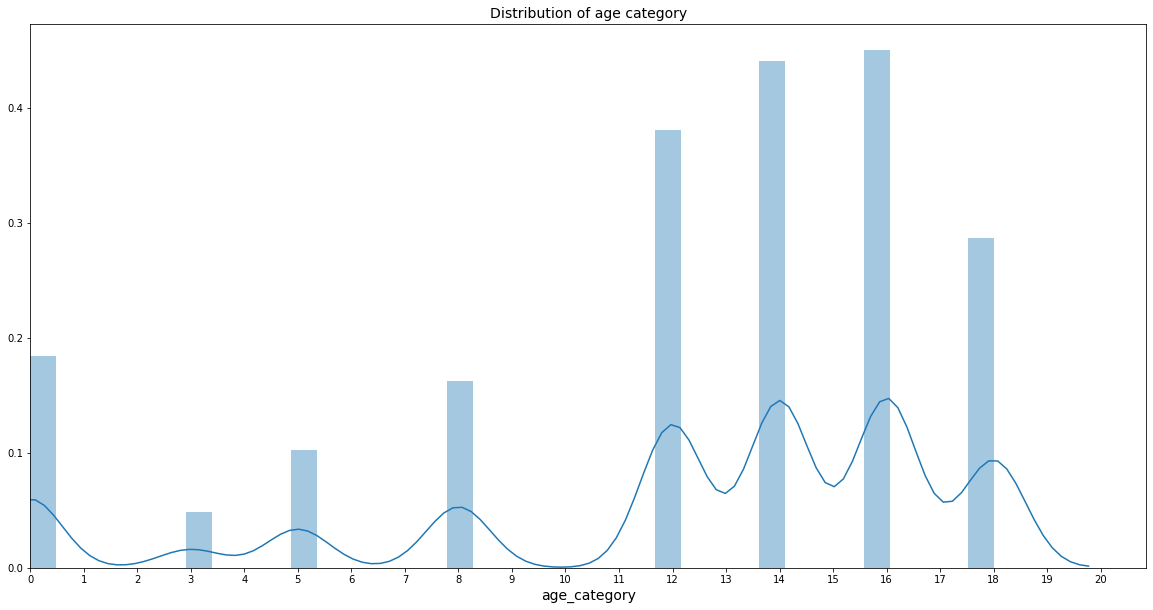

In [61]:
plt.subplots(figsize=(20, 10))
myChart = sns.distplot(fringe_2019['age_category'])
myChart.set_title('Distribution of age category',fontsize=14)
plt.xlabel('age_category',fontsize=14)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0)
plt.show()

In the data, age_category means the age restriction. According to the graph above, We can see that the proportion of the age category of 12, 14, 16 are relatively high, which means that most of the age limits for participation in Edinburgh festivals are 12 +, 14 +, and 16 +. In addition, we can see that most activities have age limits.

In [46]:
from collections import Counter
result = Counter(fringe_2019['genre'])
result

Counter({'Theatre': 1101,
         'Comedy': 1561,
         'Dance Physical Theatre and Circus': 151,
         'Music': 536,
         'Musicals and Opera': 128,
         "Children's Shows": 168,
         'Cabaret and Variety': 182,
         'Exhibitions': 56,
         'Spoken Word': 155,
         'Events': 219})

<BarContainer object of 10 artists>

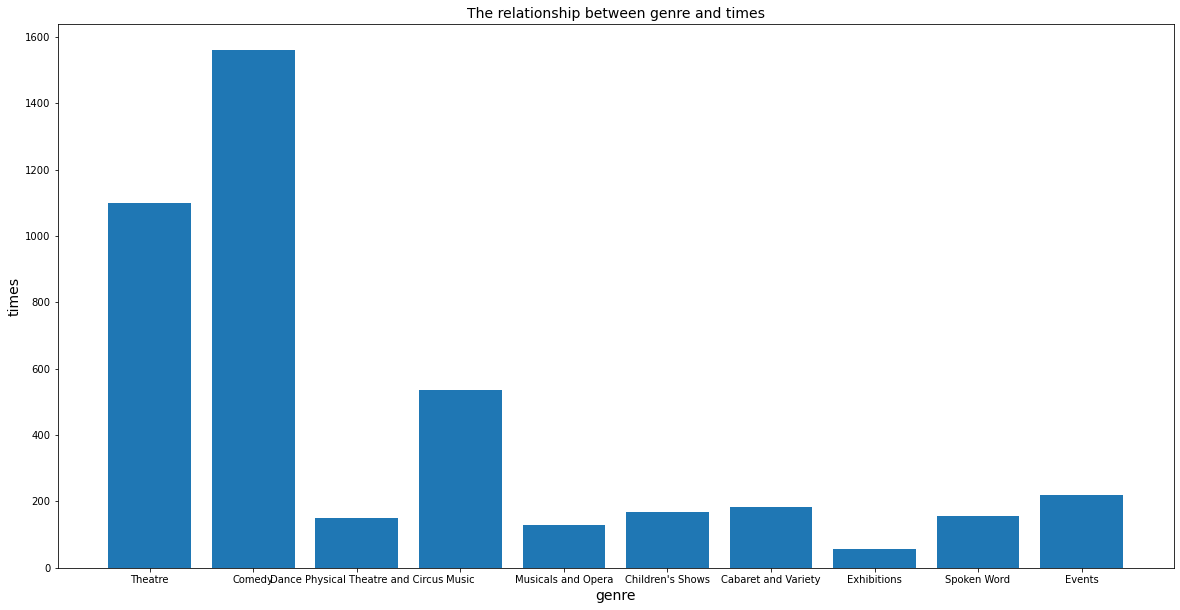

In [59]:
plt.subplots(figsize=(20, 10))
plt.xlabel('genre',fontsize=14)
plt.ylabel('times',fontsize=14)
plt.title('The relationship between genre and times',fontsize=14)
frequency_calculated = result
plt.bar(frequency_calculated.keys(), frequency_calculated.values())

According to the graph above, we can see that some performances are held many times, but some are few, which may be related to the popularity of the performances. For example, the times of holding Theatre and Comedy is relatively high, which might means that the two genres are more popular.

(Due to too many tags, I will only show the top 10 about genre_tags)

In [48]:
a= list(fringe_2019['genre_tags']) 
s1 = ','.join(str(n) for n in a)
s2 = s1.split(',')

from collections import Counter
result1 = Counter(s2).most_common(10)
from pandas.core.frame import DataFrame
new_top = DataFrame(result1, columns=['genre_top', 'times']) 
new_top

,genre_top,times
0,Stand-up,885
1,Comedy,530
2,New writing,385
3,Storytelling,377
4,Solo show,332
5,Unknown,306
6,Drama,253
7,Music,246
8,Theatre,187
9,Contemporary,182


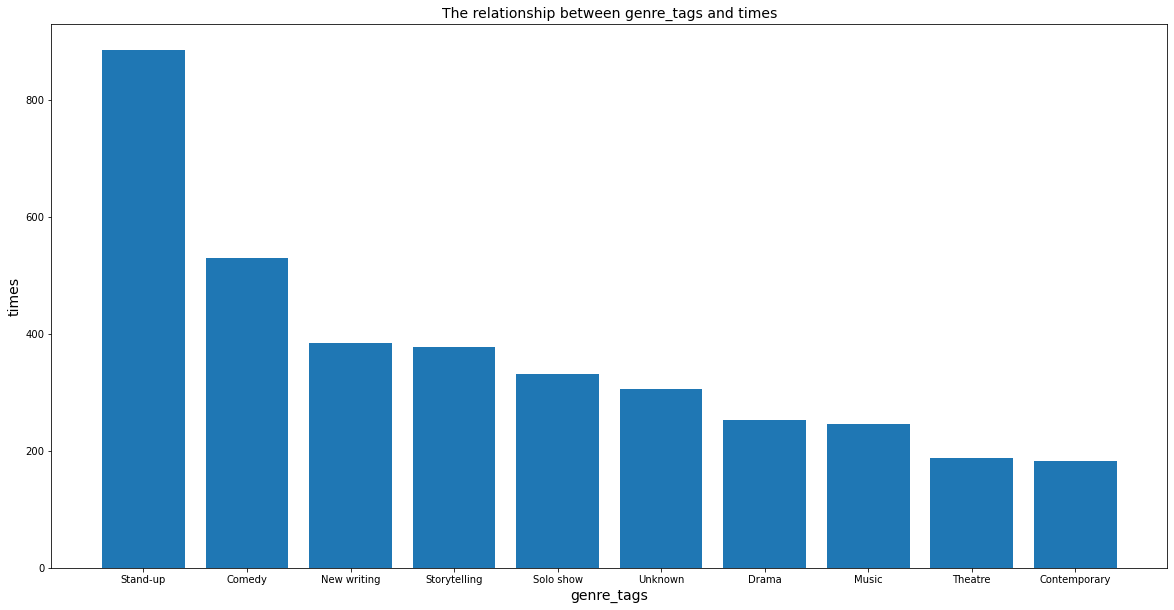

In [58]:
plt.figure(figsize=(20,10)) 
plt.bar('genre_top', 'times', data=new_top)
plt.xlabel('genre_tags',fontsize=14)
plt.ylabel('times',fontsize=14)

plt.title('The relationship between genre_tags and times',fontsize=14)
plt.show()

According to the graph above, we can see that there are relatively more performances with the tag of Stand-up, which might mean that genres with this tag are more popular.

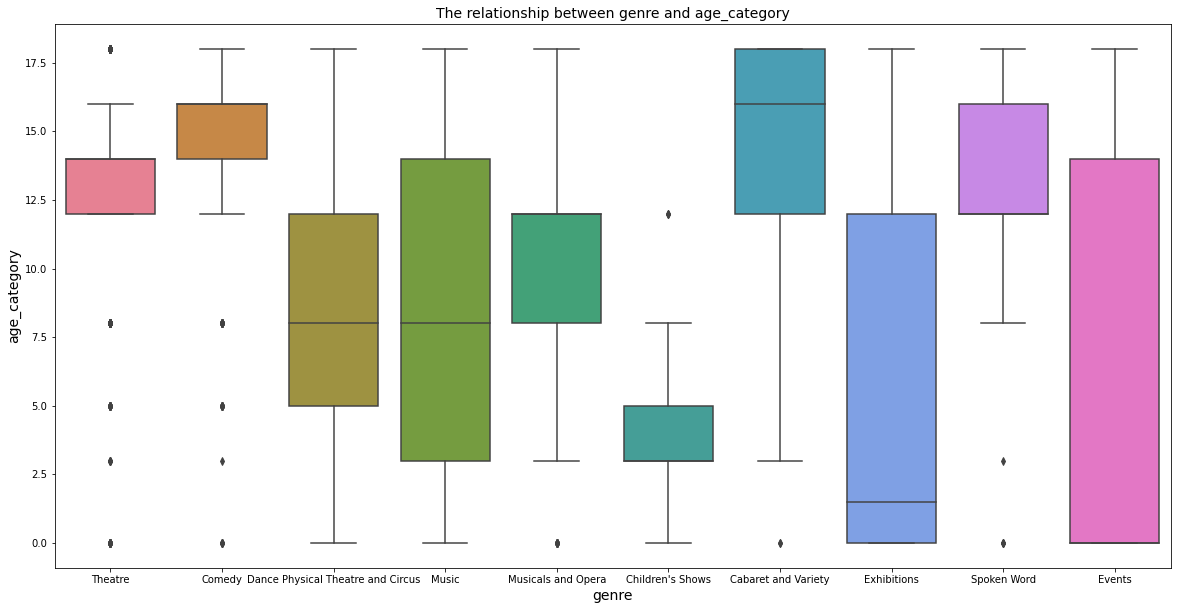

In [70]:
plt.subplots(figsize=(20, 10))
sns.boxplot(x='genre', y='age_category',data= fringe_2019 ,palette='husl')
plt.xlabel('genre',fontsize=14)
plt.ylabel('age_category',fontsize=14)

plt.title('The relationship between genre and age_category',fontsize=14)
plt.show()

According to the graph above, we can see that some performances have a wide age limit, but some are very small. For example, the range of age limit of Events, Exhibitions and Music are relatively large, but Cabaret and Variety has the highest requirement of age limit. In addition, as can be seen from the outliers, a small part of each genre of performance is not age limited. 

In [51]:
result_2017 = Counter(fringe_2017['genre']).most_common()
new_genre2017 = DataFrame(result_2017, columns=['genre', '2017']) 
result_2018 = Counter(fringe_2018['genre']).most_common()
new_genre2018 = DataFrame(result_2018, columns=['genre', '2018']) 
result_2019 = Counter(fringe_2019['genre']).most_common()
new_genre2019 = DataFrame(result_2019, columns=['genre', '2019']) 

new_genre2019.set_index(['genre'], inplace=True)
new_genre2018.set_index(['genre'], inplace=True)
new_genre2017.set_index(['genre'], inplace=True)

data = new_genre2017.join([new_genre2018,new_genre2019],how='outer')
data = data.T
data

,Comedy,Theatre,Music,Events,Cabaret and Variety,Children's Shows,Dance Physical Theatre and Circus,Spoken Word,Musicals and Opera,Exhibitions
2017,1331,1002,487,220,160,157,138,130,117,53
2018,1408,1016,524,213,217,154,122,140,136,55
2019,1561,1101,536,219,182,168,151,155,128,56


Text(0.5, 1.0, 'The relationship between years and genres')

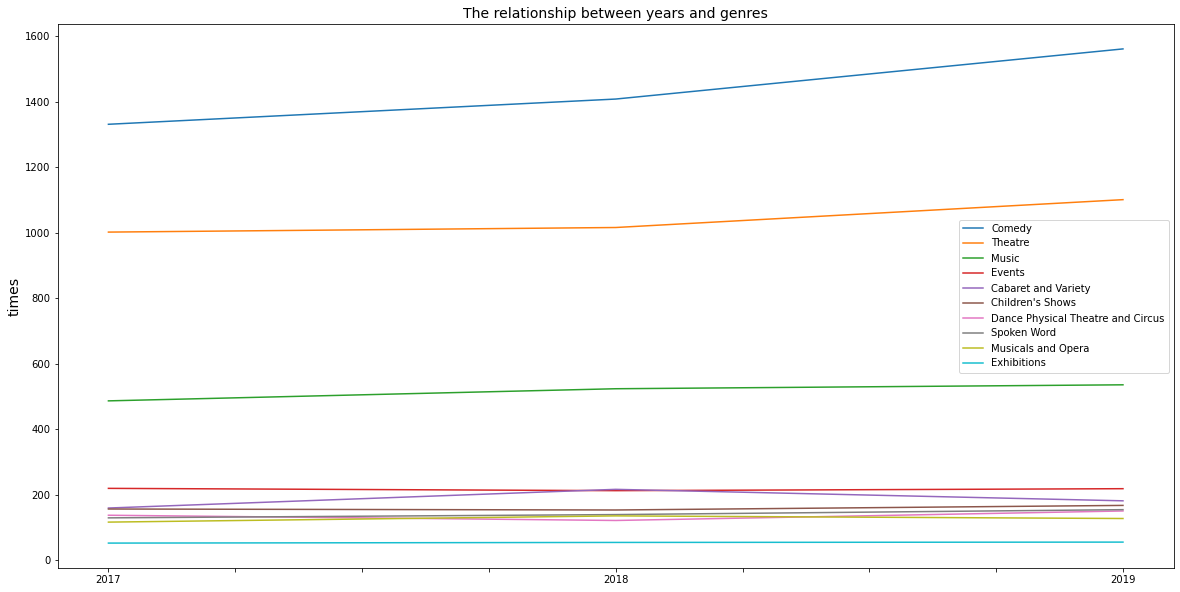

In [54]:
import matplotlib
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline 

matplotlib.rc('figure', figsize = (20, 10))
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'White')
data.plot()
plt.ylabel('times',fontsize=14)
plt.title('The relationship between years and genres',fontsize=14)

According to the graph above, we can see that with the change of years, the holding times of comedy, theatre and music has an upward trend, but other genres remain stable.



# 3. Reflect and Hypothesise

Reflect and Hypothesise: What do you think might be behind the relationships and
distributions that you have found? How does your data relate to the world?In short, what
hypotheses came up as you explored the data, and how would you go about testing them? 



### Reflect

Regarding the set of data that I analyze, I think there are some subtle correlations and obvious correlations, besides development trends. In addition, we can also discover future development trends and potential content.
1. Subtle correlation: For example, about the data of genre and genre_tags, we can clearly see that the times of some activities is very high or very low, which may be related to the popularity.
2. Obvious correlation: The relationship between age restriction and genre is obvious, such as children's activities, which are restricted to a small age group. 
3. From the graph about the relationship between years and genres, we can infer future trends. The graph shows an upward trend, which might mean that certain types of activities will still rise in the future.
4. From these contents, it may be possible to find people's preferences for participating in performances, job opportunities, and future development trends of related jobs. In addition, it can also analyze which activities are not popular with the public, and their development potential, but these need to be further explored.

### Hypotheses

1. Comedy is the most popular event, because the graph shows that it has been held the most. But it may be related to the duration of the event and the cost of holding the event. For example, the number of exhibitions is very small. However, this may be because it takes a long time each time and does not mean that it is not popular. So I will check the approximate duration of these events and the rental cost of the venue.


2. Comedy artists have more job opportunities. Because there are more such performances. I will check the number of artists in these performances, and infer whether the competition is fierce.


3. Workers in children's shows have fewer job opportunities. Because most events have age restrictions and children's shows are held less frequently. I will check the number of workers in these activities and check whether they are also engaged in other types of performances.


4. If there is no impact of the epidemic, as time grows, the times of holding these performances will increase, especially comedy. This may be related to people's increasing living standards and requires more advanced algorithms to predict future trends.